# Utilizando algoritmo classificador com Maquinas de Vetores de Suporte (SVM) para a previsão de pagamento

## Importando a biblioteca para a classificação por Maquinas de Vetores de Suporte (SVM) e a biblioteca que irá carregar os dados de treinamento e teste


In [1]:
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [3]:
# Verificando o shape dos atributos
X_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

### Com SVM, foi necessário fazer testes com as funções de dimensionalidade. Ao final, a função padrão do algoritmo "rbf" (Função de Base Radial) foi a que teve o melhor desenpenho, junto com o "C" de valor 2.0

In [7]:
#AUMENTADO A DIMENSIONALIDADE DOS DADOS COM KERNEL LINEAR
svm_linear = SVC(kernel="linear", random_state=1, C = 1.0)
svm_linear.fit(X_base_treinamento, y_base_treinamento)

previsao = svm_linear.predict(X_base_teste)

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 94.6%


In [11]:
#AUMENTADO A DIMENSIONALIDADE DOS DADOS COM KERNEL POLINOMIAL
svm_polinomial = SVC(kernel="poly", random_state=1, C = 1.0)
svm_polinomial.fit(X_base_treinamento, y_base_treinamento)

previsao = svm_polinomial.predict(X_base_teste)
y_base_teste

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 96.8%


In [12]:
#AUMENTADO A DIMENSIONALIDADE DOS DADOS COM KERNEL SIGMOID
svm_sigmoid = SVC(kernel="sigmoid", random_state=1, C = 1.0)
svm_sigmoid.fit(X_base_treinamento, y_base_treinamento)

previsao = svm_sigmoid.predict(X_base_teste)
y_base_teste

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 83.8%


In [13]:
# AUMENTADO A DIMENSIONALIDADE DOS DADOS COM KERNEL DE FUNÇÃO DE BASE RADIAL
svm_rbf = SVC(kernel="rbf", random_state=1, C = 1.0)
svm_rbf.fit(X_base_treinamento, y_base_treinamento)

previsao = svm_rbf.predict(X_base_teste)
y_base_teste

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 98.2%


## AUMENTADO A DIMENSIONALIDADE DOS DADOS COM KERNEL DE FUNÇÃO DE BASE RADIAL COM O "C" DE VALOR 2.0, AUMENTANDO A TENDENCIA DO ALGORITMO DE ENCONTRAR A LINHA PARA SEPARAR AS CLASSES

In [14]:
svm_rbf2 = SVC(kernel="rbf", random_state=1, C = 2.0)
svm_rbf2.fit(X_base_treinamento, y_base_treinamento)

previsao = svm_rbf2.predict(X_base_teste)
y_base_teste

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 98.8%


## Visualizando onde está a maior precisão do algoritmo, se no pagante ou não-pagante. Neste caso, mesmo com uma maior precisão do algoritmo é nos pagantes a maior taxa de acertos, o que não seria o ideal, visto que o objetivo do algoritmo seria evitar a perda de dinheiro por emprestimo de um banco. 

0.988

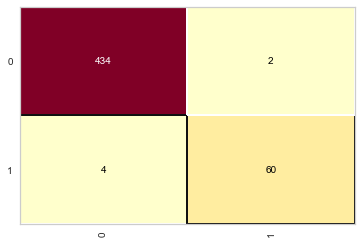

In [16]:
cm = ConfusionMatrix(svm_rbf2)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [17]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



#### O algoritmo consegue identificar corretamente 100% dos dados da classe 0 (Pagantes) com uma precisão de 99% e 94% dos dados da classe 1 (Não-Pagantes) com uma precisão de 97%.

# FIM